<a href="https://colab.research.google.com/github/walfonso/TFI/blob/master/Clasificaci%C3%B3n_de_Candidatos_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo AI**
# **Clasificación de Candidatos**



## **Importación de librerias**



**import pandas as pd:** pandas es una biblioteca muy popular en Python para la manipulación y análisis de datos. Se utiliza para trabajar con estructuras de datos tabulares, como DataFrames, que son muy útiles para cargar, limpiar y analizar datos.

 **import numpy as np:** numpy es una biblioteca esencial para realizar cálculos numéricos en Python. Proporciona matrices y funciones matemáticas  fundamentales en el procesamiento de datos y la implementación de algoritmos de aprendizaje automático.

**import tensorflow as tf:** tensorFlow es una biblioteca de código abierto desarrollada por Google que se utiliza para construir y entrenar modelos de aprendizaje automático, especialmente redes neuronales.

**from sklearn.model_selection import train_test_split:** scikit-learn es una biblioteca de aprendizaje automático en Python. La función train_test_split se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba, lo que es esencial para evaluar la capacidad de generalización de un modelo de aprendizaje automático.

**from sklearn.preprocessing import StandardScaler:** StandardScaler es una clase de scikit-learn que se utiliza para escalar características (variables) de un conjunto de datos para que tengan una media de 0 y una desviación estándar de 1.

**from tensorflow.keras.models import Sequential:** Sequential es una clase proporcionada por TensorFlow que se utiliza para construir modelos de redes neuronales secuenciales, que son modelos en los que las capas se conectan en serie.

**from tensorflow.keras.layers import Dense:** Dense es una capa en TensorFlow que se utiliza para construir capas de neuronas completamente conectadas en una red neuronal. Estas capas se utilizan comúnmente en redes neuronales feedforward.

**from tensorflow.keras.utils import to_categorical:** to_categorical es una función de TensorFlow que se utiliza para convertir etiquetas categóricas en representación one-hot. Esto es útil cuando estás trabajando con problemas de clasificación y necesitas representar las etiquetas en una forma que sea comprensible para la red neuronal.

**import matplotlib.pyplot as plt:** matplotlib es una biblioteca ampliamente utilizada para la visualización de datos en Python. La importación plt es una convención común que se utiliza para abreviar el nombre de matplotlib.pyplot, lo que facilita la creación de gráficos y visualizaciones.






In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import statsmodels.api as sm

**Luego de importar la biblioteca Pandas utilizando el alias "pd".**

A traves de la función "pd.read_excel("Datos_Modelo_reducido.xlsx")" utilizada para cargar los datos desde un archivo Excel llamado "Datos_Modelo_reducido.xlsx". Esta función toma el nombre del archivo como argumento y devuelve un DataFrame que contiene los datos.

Se asigna el DataFrame resultante a la variable "df". Esto nos permite acceder y manipular los datos de manera conveniente.

Finalmente, se utiliza print(df) para mostrar el contenido del DataFrame en la consola. Esto imprimirá los datos del archivo Excel en formato tabular en la salida estándar.


Los **outliers** o valores atípicos son puntos de datos que se alejan significativamente del resto de observaciones en un conjunto de datos, ya sea por ser inusualmente grandes o pequeños en comparación con el resto. Pueden surgir por la propia variabilidad del conjunto de datos o por errores de medición o de entrada.


    Unnamed: 0  Experiencia  Idioma  VE  FyS
0            2           10       0   0    0
1            3           10       5   0    0
2            4            0       2   1    0
3            7            8       0   1    0
4           12            8       5   0    0
5           13           10      10   1    1
6           14            2       5   0    0
7           15            2       5   1    1
8           20            0       5   0    0
9           26            8       5   0    1
10          28            0      10   1    1
11          30            6      10   0    0
12          32            8       2   1    1
13          35            8       0   1    1
14          36            0       2   0    0
15          37           10       2   0    0
16          41           10       2   0    1
17          42           10       5   1    0
18          46            0       5   1    1
19          54            2       2   1    0
Unnamed: 0     int64
Experiencia    int64
Idioma       

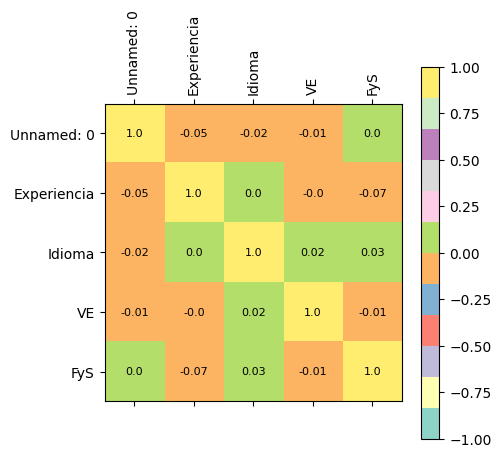

######  Inicio Experiencia  ########
count    1514.000000
mean        5.239102
std         3.742138
min         0.000000
25%         2.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: Experiencia, dtype: float64
######  Fin Experiencia  ########


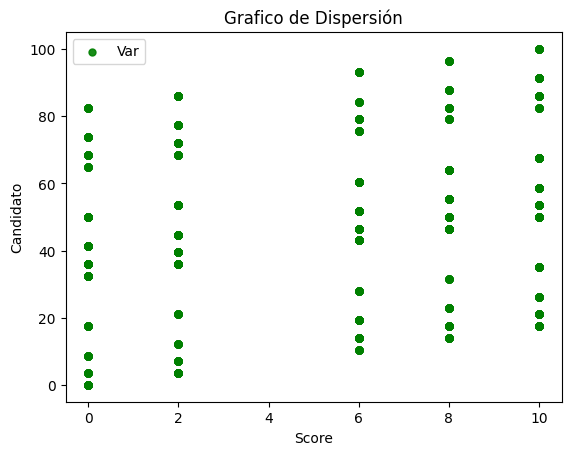

In [7]:
# Cargar los datos desde el archivo Excel
df = pd.read_excel("drive/MyDrive/UAI/TFI/Datos_Modelo_reducido.xlsx")
dff= df.drop(['Score', 'Candidato'], axis=1)
print(dff.head(20))
print (dff.dtypes)
print (dff.describe())
print ("######  Datos de correlación  ########")
print ("-1 Correlacion fuerte negativa ## 0 ## 1 Correlación fuerte positiva")
print(dff.corr())
corr = dff.corr()
#sm.graphics.plot_corr(corr, xnames=list(dff.columns))
plt.matshow(corr, cmap="Set3", vmin=-1, vmax=1)
plt.xticks(range(5), dff.columns, rotation=90)
plt.yticks(range(5), dff.columns)
for i in range(len(corr.columns)):
  for j in range(len(corr.columns)):
      plt.text(i, j, round(corr.iloc[i, j], 2), fontsize=8, ha="center", va="center")
plt.colorbar()
plt.show()


print ("######  Inicio Experiencia  ########")
print (dff['Experiencia'].describe())
print ("######  Fin Experiencia  ########")
plt.scatter(df.Experiencia, df.Score, c="g", s=100, marker=r".", alpha=0.9, label="Var")
plt.xlabel("Score")
plt.ylabel("Candidato")
plt.title("Grafico de Dispersión")
plt.legend(loc="upper left")
plt.show()

# Indentifico los grupos de datos: 3 grupos


# **Definir las características (entradas) y las etiquetas (salida)**

---



**Caracteristica: Experiencia**

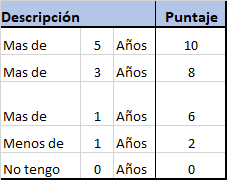

**Caracteristica: Idioma**

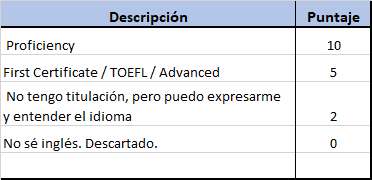


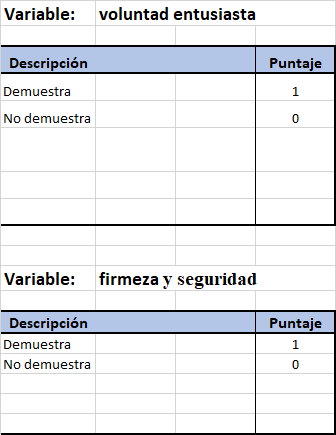


Clasificación

```
,,,Puntaje
Muy Bueno,,,3
Bueno,,,2
Regular,,,1
```

https://es.wikipedia.org/wiki/One-hot

Binario	Código Gray	One-hot
000	    000	        00000001
001	    001	        00000010
010	    011	        00000100
011	    010	        00001000
100	    110	        00010000
101	    111	        00100000
110	    101	        01000000
111	    100	        10000000


In [8]:
# Definir las características (entradas) y las etiquetas (salida)
X = df[['Experiencia', 'Idioma', 'VE', 'FyS']].values
y = df['Candidato'].values

print ("------ sin cat")
print(y)
print ("------ FIN -----")

# Convertir las etiquetas a una representación one-hot
y = to_categorical(y - 1)  # Restar 1 para convertir las etiquetas 1, 2, 3 a 0, 1, 2 y luego a one-hot
print ("------ Y")
print(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("------Antes----")
print(X_test)
# Estandarizar los datos
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
print("------Despues---")
print(X_test)

------ sin cat
[1 1 2 ... 2 3 2]
------ FIN -----
------ Y
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
------Antes----
[[ 8 10  0  0]
 [ 8 10  0  1]
 [ 6  5  0  0]
 ...
 [ 8  5  1  1]
 [10  0  1  1]
 [ 0  5  0  0]]
------Despues---
[[ 8 10  0  0]
 [ 8 10  0  1]
 [ 6  5  0  0]
 ...
 [ 8  5  1  1]
 [10  0  1  1]
 [ 0  5  0  0]]


# **Construir el modelo**

**Explicación:**

**1- Definición de la red neuronal**

Se importa TensorFlow, que es una biblioteca de aprendizaje automático y se utiliza para construir modelos de redes neuronales, y la clase Sequential de Keras. Sequential es una forma de construir modelos de redes neuronales capa por capa en la que las capas se apilan en serie.

Se crea una instancia del modelo utilizando Sequential(). Se inicializa un modelo vacío, al que se le agregarán capas.

Se agrega la **primera capa densa** (totalmente conectada) al modelo con modelo.add(...). Esta capa tiene 100 neuronas y utiliza la función de activación ReLU (Rectified Linear Unit). También especificamos la forma de entrada utilizando input_shape, que se ajusta a la cantidad de características en X_train, los datos de entrenamiento.

Se agrega una **segunda capa densa** con 100 neuronas y función de activación ReLU. No es necesario especificar input_shape en esta capa, ya que Keras infiere automáticamente la forma de entrada de la capa anterior.

Finalmente, se agrega **la capa de salida** con 3 neuronas y la función de activación softmax. La función softmax se utiliza comúnmente en problemas de clasificación multiclase para generar probabilidades de pertenencia a cada clase.

La función **modelo.summary()** imprime un resumen del modelo en la consola, que muestra las capas, el número de parámetros en cada capa y la forma de salida de cada capa. Esto es útil para comprender la arquitectura del modelo y verificar que se haya definido correctamente.





---


**2- Compilación del modelo**
El código compila un modelo de aprendizaje automático para la clasificación multiclase, especificando la función de pérdida, el optimizador y la métrica de precisión, y luego entrena el modelo durante 20 épocas utilizando los datos de entrenamiento.
  
***El método compile se utiliza para definir ciertos aspectos clave del modelo, que incluyen:***

>**a- loss='categorical_crossentropy':** Esto establece la función de pérdida que se utilizará para evaluar cuán bien se está desempeñando el modelo durante el entrenamiento. En este caso, categorical_crossentropy es una función de pérdida comúnmente usada en problemas de clasificación multiclase. Mide la discrepancia entre las predicciones del modelo y las etiquetas reales de los datos de entrenamiento.

>**b- optimizer='adam':** Se especifica el algoritmo de optimización que se utilizará para ajustar los pesos del modelo durante el entrenamiento. 'Adam' es un optimizador popular que se adapta de manera eficiente a diferentes tasas de aprendizaje en cada parámetro del modelo.

>**c- metrics=['accuracy']:** Aquí se define una métrica para evaluar el rendimiento del modelo durante el entrenamiento. En este caso, se está utilizando la métrica de precisión ('accuracy') para medir con qué precisión el modelo predice las clases de los datos de entrenamiento.





Capa 1        Capa 2            Epoch        Accuracy  

10              10                 30            99

100           100                  20            99


**X_train:** Este es el conjunto de datos de entrenamiento que contiene las características de tus ejemplos de entrenamiento. Cada fila de X_train generalmente representa un ejemplo de entrada.

y**_train:** Este es el conjunto de etiquetas (objetivo) correspondiente a tus ejemplos de entrenamiento en X_train. Cada elemento de y_train se asocia con una fila de X_train y contiene la etiqueta (o salida deseada) para ese ejemplo.

**epochs:** Es el número de épocas (iteraciones completas a través de todo el conjunto de datos de entrenamiento) que el modelo se entrenará. En tu caso, se han especificado 30 épocas.

**batch_size:** Define el tamaño del lote de datos que se utilizará en cada paso de entrenamiento. En este caso, se utiliza un tamaño de lote de 32, lo que significa que se procesarán 32 ejemplos a la vez antes de actualizar los pesos del modelo.

**verbose:** Controla la cantidad de información que se mostrará durante el entrenamiento. Un valor de 1 generalmente significa que se mostrará información de progreso durante el entrenamiento.


**Algunos puntos clave sobre cómo funciona epochs en el entrenamiento de un modelo:**

**Inicio:** Al comienzo del entrenamiento, los pesos del modelo generalmente se inicializan de forma aleatoria.

**Iteraciones:** Durante cada época, el modelo pasa por cada ejemplo de entrenamiento en el conjunto de datos, realiza una predicción, calcula la pérdida y ajusta los pesos para minimizar esa pérdida.

**Actualización de pesos:** Los algoritmos de optimización, como el descenso de gradiente, se utilizan para ajustar los pesos del modelo de manera que se reduzca la función de pérdida. Cuantas más épocas se realicen, más oportunidades tendrá el modelo de ajustar sus pesos y mejorar su rendimiento.

**Convergencia:** El entrenamiento continúa durante el número especificado de épocas o hasta que se alcance algún criterio de detención (por ejemplo, si la pérdida deja de disminuir significativamente). Si la pérdida sigue disminuyendo con cada época, el modelo está mejorando. Sin embargo, es importante encontrar un equilibrio, ya que el sobreajuste puede ocurrir si se entrena durante demasiadas épocas.

El valor óptimo para epochs puede variar según el problema y el conjunto de datos. En algunos casos, se puede determinar automáticamente utilizando técnicas como la validación cruzada. Un valor muy bajo puede resultar en un modelo subentrenado, mientras que un valor muy alto puede llevar al sobreajuste. En la práctica, a menudo se utiliza una combinación de validación cruzada y observación del rendimiento del modelo en un conjunto de validación para determinar el número óptimo de épocas.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 739 (2.89 KB)
Trainable params: 739 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Comenzando el entrenamiento...
Epoch 1/20
38/38 [==============================] - 1s 2ms/step - loss: 1.2036 - accuracy: 0.3625
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 1.0469 - accuracy: 0.4905
Epoch 3/20
38/38 [==============================] - 0s 2ms/step

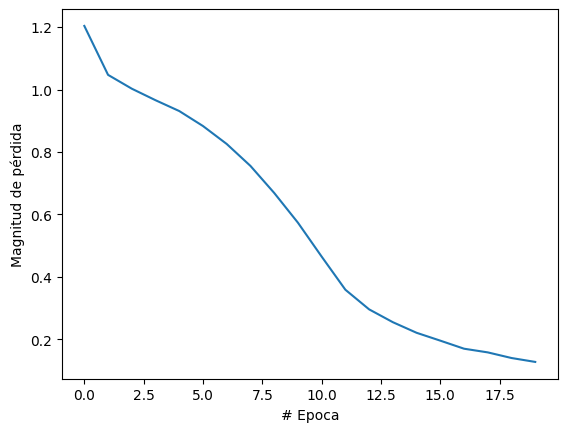

10/10 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9439
Pérdida en los datos de prueba: 0.13126112520694733
Precisión en los datos de prueba: 0.9438943862915039


In [9]:
# Construir el modelo de red neuronal
modelo = Sequential()
modelo.add(Dense(32, activation='relu', input_shape=(4,))) #X_train.shape[1]
modelo.add(Dense(16, activation='relu'))
modelo.add(Dense(3, activation='softmax'))  # Función de activación softmax para clasificación multiclase
modelo.summary()

# Compilar el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Función de pérdida categorical_crossentropy para clasificación multiclase

# Entrenar el modelo
print("Comenzando el entrenamiento...")
historial = modelo.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
print("Modelo entrenado!")

weights, biases = modelo.layers[0].get_weights()
# Muestra los pesos
print("Pesos de la primera capa:")
print(weights)

# Muestra los sesgos
print("Sesgos de la primera capa:")
print(biases)
print("########################")

# Graficar la pérdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])
plt.show()

# Evaluación del modelo
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Pérdida en los datos de prueba:", loss)
print("Precisión en los datos de prueba:", accuracy)




In [11]:
# Realizar predicciones en nuevos datos

#print(X_test)

nuevo_candidato = np.array([[2, 5, 0, 1]])  # Ejemplo de nuevo candidato
print (nuevo_candidato)
#nuevo_candidato = scaler.transform(nuevo_candidato)
print (nuevo_candidato)
probabilidades = modelo.predict(nuevo_candidato)[0]
clase_predicha = np.argmax(probabilidades) + 1  # Sumar 1 para volver a etiquetas originales (1, 2, 3)
print("Las probabilidades de pertenecer a cada clase son:")
for i, probabilidad in enumerate(probabilidades):
    print(f"Clase {i + 1}: {probabilidad:.2f}")
print(f"Clase predicha: {clase_predicha}")


[[2 5 0 1]]
[[2 5 0 1]]
1/1 [==============================] - 0s 32ms/step
Las probabilidades de pertenecer a cada clase son:
Clase 1: 0.02
Clase 2: 0.86
Clase 3: 0.12
Clase predicha: 2


## ***Fin Seminario de Aplicación Profesional***

Exportar el modelo

In [ ]:
# Guardar el modelo
modelo.save('select_candidate.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
